<a href="https://colab.research.google.com/github/CuriousAnmol/CuriousAnmol-Smart_Home_Electricity_Load_Management_System/blob/main/Smart_Home_Electricity_Load_Management_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("/content/smart_home_energy_data.csv")

In [2]:
# Check for Missing Values
print("Missing Values Before Handling:\n", df.isnull().sum())

Missing Values Before Handling:
 Timestamp               0
Appliance               0
Total Energy (kWh)      0
Source                  0
Battery Level (%)       0
Inverter Output (kW)    0
Hour                    0
dtype: int64


In [13]:
# Fill missing values with appropriate methods
df.fillna({"Total Energy (kWh)": df["Total Energy (kWh)"].median(),
           "Battery Level (%)": df["Battery Level (%)"].median(),
           "Inverter Output (kW)": df["Inverter Output (kW)"].median()}, inplace=True)


In [4]:
# Remove Duplicates
df.drop_duplicates(inplace=True)

In [5]:
# Convert Timestamp to Datetime Format
df["Timestamp"] = pd.to_datetime(df["Timestamp"])

In [6]:
# Final Data Overview
print("\nData After Cleaning:")
print(df.info())
print("\nFirst 5 Rows After Cleaning:")
print(df.head())


Data After Cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Timestamp             500 non-null    datetime64[ns]
 1   Appliance             500 non-null    object        
 2   Total Energy (kWh)    500 non-null    float64       
 3   Source                500 non-null    object        
 4   Battery Level (%)     500 non-null    int64         
 5   Inverter Output (kW)  500 non-null    float64       
 6   Hour                  500 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 27.5+ KB
None

First 5 Rows After Cleaning:
            Timestamp        Appliance  Total Energy (kWh) Source  \
0 2025-01-01 00:00:00  Washing Machine                0.86  Solar   
1 2025-01-01 00:30:00           Heater                1.64   Grid   
2 2025-01-01 01:00:00  Washi

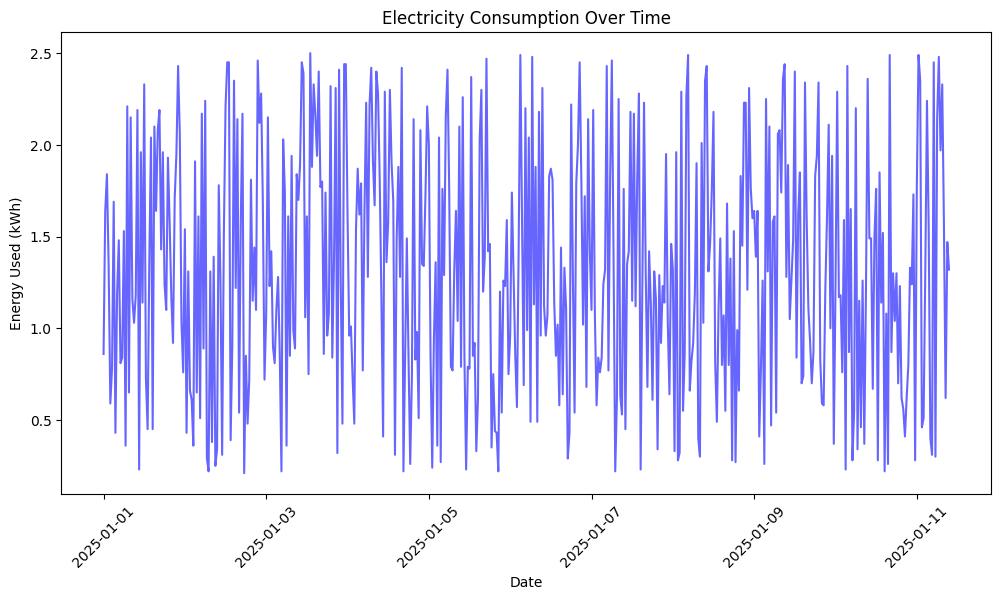

In [7]:
# Convert timestamp to datetime
df["Timestamp"] = pd.to_datetime(df["Timestamp"])

# Plot electricity consumption over time
plt.figure(figsize=(12, 6))
plt.plot(df["Timestamp"], df["Total Energy (kWh)"], color='blue', alpha=0.6)
plt.xlabel("Date")
plt.ylabel("Energy Used (kWh)")
plt.title("Electricity Consumption Over Time")
plt.xticks(rotation=45)
plt.show()

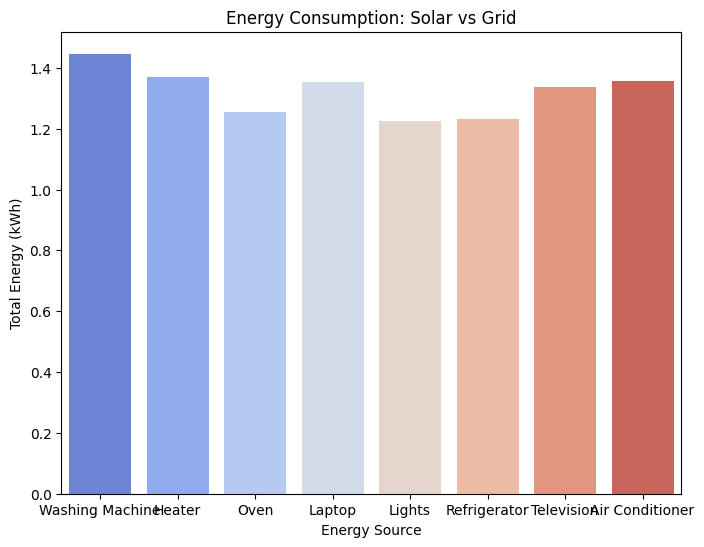

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.barplot(x="Appliance", y="Total Energy (kWh)", hue="Appliance", data=df, errorbar=None, palette="coolwarm", legend=False)
plt.xlabel("Energy Source")
plt.ylabel("Total Energy (kWh)")
plt.title("Energy Consumption: Solar vs Grid")
plt.show()


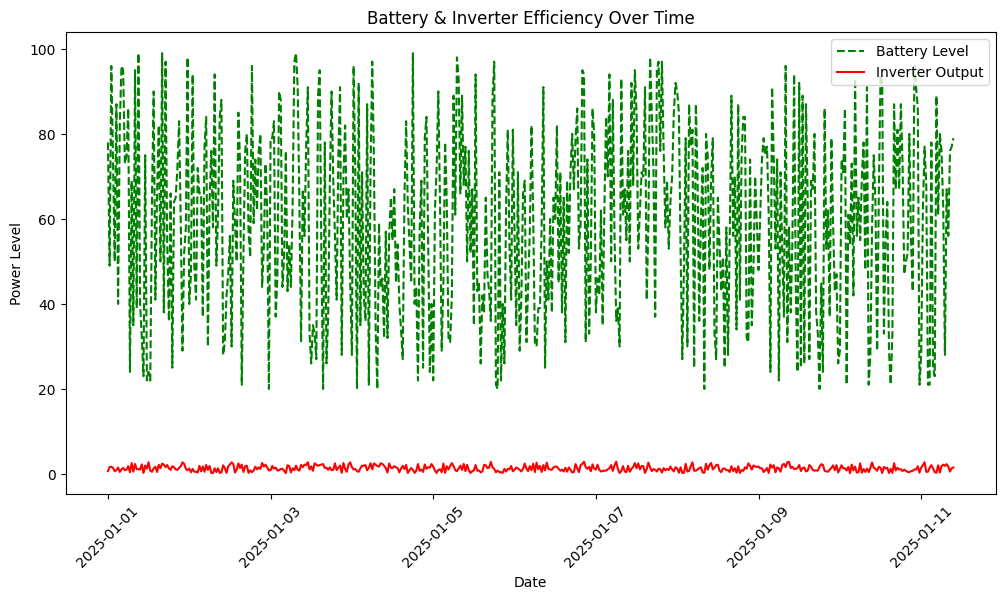

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(df["Timestamp"], df["Battery Level (%)"], color='green', label='Battery Level', linestyle='dashed')
plt.plot(df["Timestamp"], df["Inverter Output (kW)"], color='red', label='Inverter Output')
plt.xlabel("Date")
plt.ylabel("Power Level")
plt.title("Battery & Inverter Efficiency Over Time")
plt.legend()
plt.xticks(rotation=45)
plt.show()

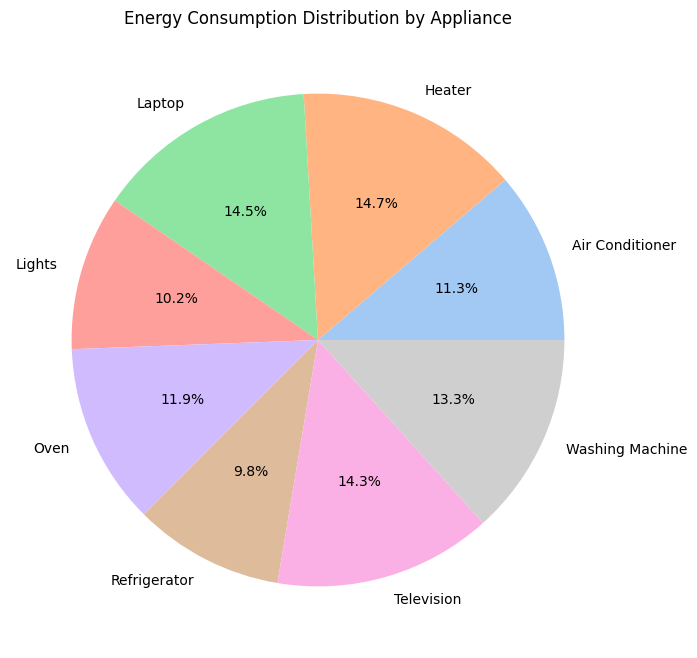

In [10]:
plt.figure(figsize=(8, 8))
df_grouped = df.groupby("Appliance")["Total Energy (kWh)"].sum()
plt.pie(df_grouped, labels=df_grouped.index, autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title("Energy Consumption Distribution by Appliance")
plt.show()

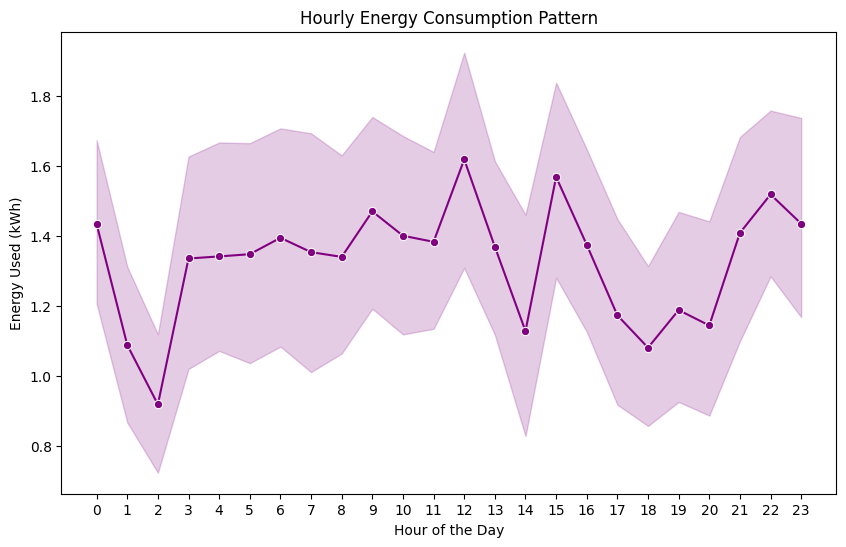

In [11]:
df["Hour"] = df["Timestamp"].dt.hour  # Extract hour for hourly patterns

plt.figure(figsize=(10, 6))
sns.lineplot(x=df["Hour"], y=df["Total Energy (kWh)"], marker="o", color="purple")
plt.xlabel("Hour of the Day")
plt.ylabel("Energy Used (kWh)")
plt.title("Hourly Energy Consumption Pattern")
plt.xticks(range(0, 24))
plt.show()

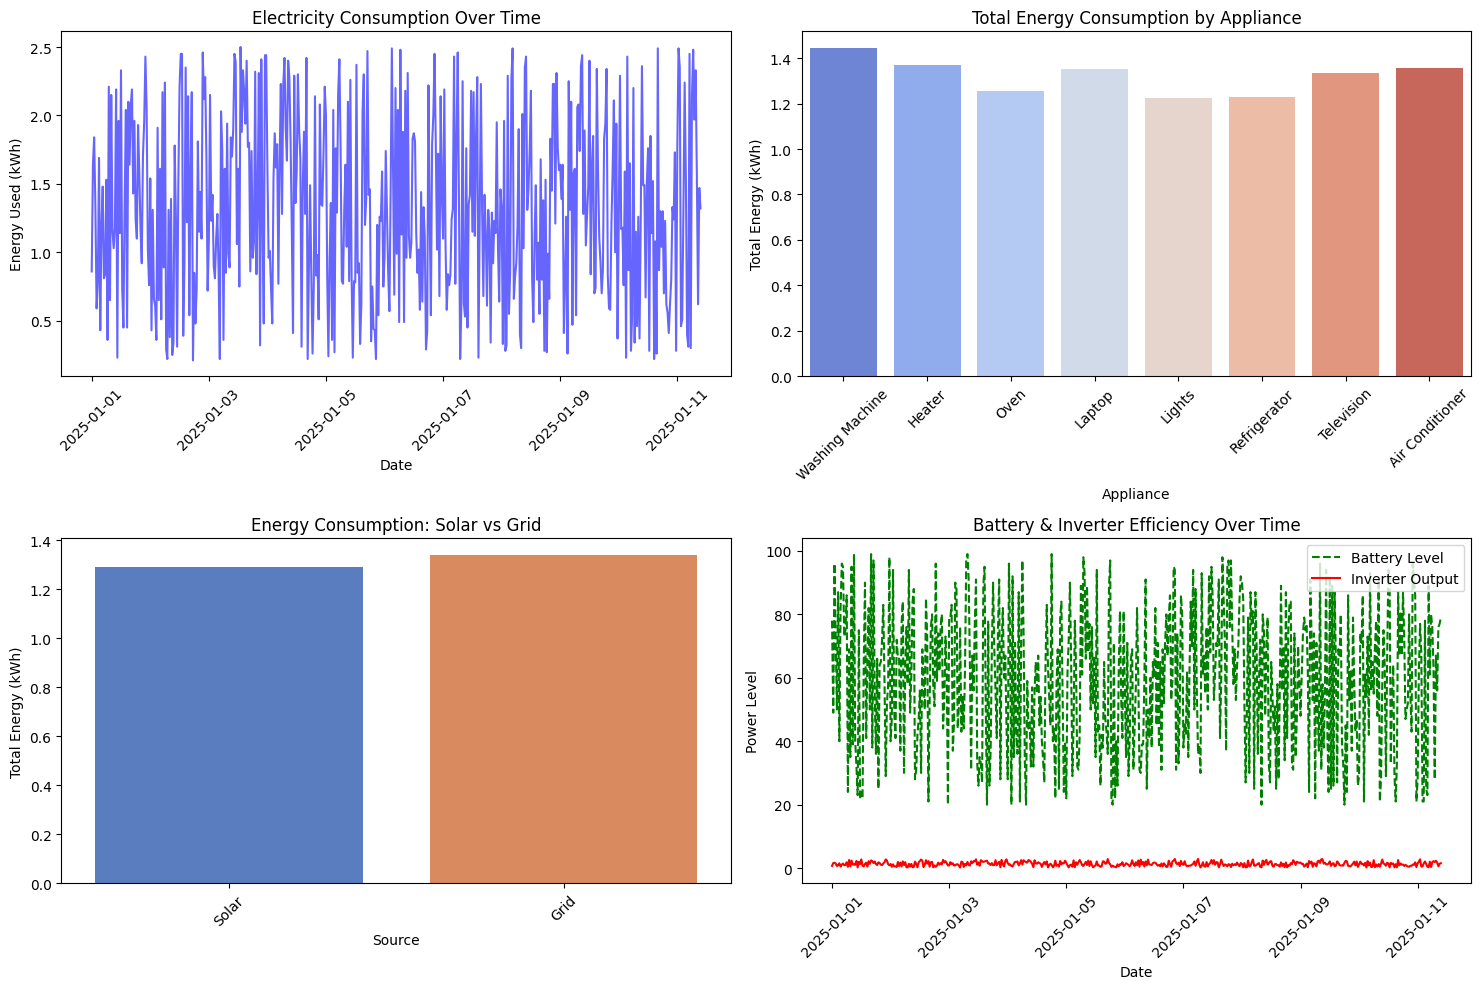

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Subplot 1: Electricity Consumption Over Time
axes[0, 0].plot(df["Timestamp"], df["Total Energy (kWh)"], color='blue', alpha=0.6)
axes[0, 0].set_xlabel("Date")
axes[0, 0].set_ylabel("Energy Used (kWh)")
axes[0, 0].set_title("Electricity Consumption Over Time")
axes[0, 0].tick_params(axis='x', rotation=45)

# Subplot 2: Appliance-wise Power Usage
sns.barplot(x="Appliance", y="Total Energy (kWh)", hue="Appliance", data=df, errorbar=None, ax=axes[0, 1], palette="coolwarm", legend=False)
axes[0, 1].set_title("Total Energy Consumption by Appliance")
axes[0, 1].tick_params(axis='x', rotation=45)

# Subplot 3: Energy Consumption by Source (Solar vs Grid)
sns.barplot(x="Source", y="Total Energy (kWh)", hue="Source", data=df, errorbar=None, ax=axes[1, 0], palette="muted", legend=False)
axes[1, 0].set_title("Energy Consumption: Solar vs Grid")
axes[1, 0].tick_params(axis='x', rotation=45)

# Subplot 4: Battery Storage & Inverter Efficiency
axes[1, 1].plot(df["Timestamp"], df["Battery Level (%)"], color='green', label='Battery Level', linestyle='dashed')
axes[1, 1].plot(df["Timestamp"], df["Inverter Output (kW)"], color='red', label='Inverter Output')
axes[1, 1].set_xlabel("Date")
axes[1, 1].set_ylabel("Power Level")
axes[1, 1].set_title("Battery & Inverter Efficiency Over Time")
axes[1, 1].legend()
axes[1, 1].tick_params(axis='x', rotation=45)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()
